# jointplot using seaborn  

* Draw a plot of two variables with bivariate and univariate graphs.
* This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.
* <code>seaborn.jointplot(x=, y=, data=,...)</code>
* [seaborn docs for jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-----------

## Data wrangling

In [2]:
df=pd.read_csv("data\Compustat_from_1990.csv")[['fyear', 'tic', 'sich', 'at', 'ni', 'mv', 'sale']] # mv is already in million dollars.
df= df[(df.fyear>=2019) & (df.fyear<=2020)]
print(df.shape)
df.head()

(10470, 7)


,fyear,tic,sich,at,ni,mv,sale
29,2019,AIR,5080.0,2079.000,4.400,707.90649,2089.300
30,2020,AIR,5080.0,1539.700,35.800,1476.90625,1651.400
217,2019,AAL,4512.0,59995.000,1686.000,12280.86204,45768.000
218,2020,AAL,4512.0,62008.000,-8885.000,9800.73960,17337.000
254,2019,CECE,3564.0,408.637,17.707,269.14942,341.869


In [3]:
# one-digit sic
df['sic1']=(df['sich']//1000).astype(int)

# ROA
df=df[df['at']>=1000]
df['lag_at']= df.groupby('tic')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']
df.dropna(inplace= True)

# log(at)
df['log_at']=np.log(df['at'])

print(df.shape)
df.head()

(1747, 11)


,fyear,tic,sich,at,ni,mv,sale,sic1,lag_at,ROA,log_at
30,2020,AIR,5080.0,1539.700,35.800,1476.90625,1651.400,5,2079.000,0.017220,7.339343
218,2020,AAL,4512.0,62008.000,-8885.000,9800.73960,17337.000,4,59995.000,-0.148096,11.035019
355,2020,PNW,4911.0,20020.421,550.559,9009.40560,3586.982,4,18479.247,0.029793,9.904508
416,2020,ABT,3845.0,72548.000,4495.000,193931.97270,34608.000,3,67887.000,0.066213,11.192004
795,2020,AMD,3674.0,8962.000,2490.000,111060.81000,9763.000,3,6028.000,0.413072,9.100749


-----------

## Jointplot

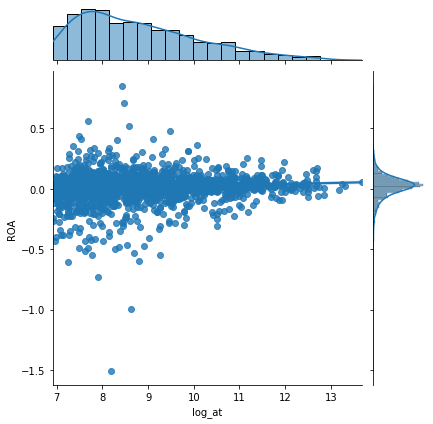

In [7]:
sns.jointplot(x='log_at', y= 'ROA', data= df, kind='reg')
plt.show()

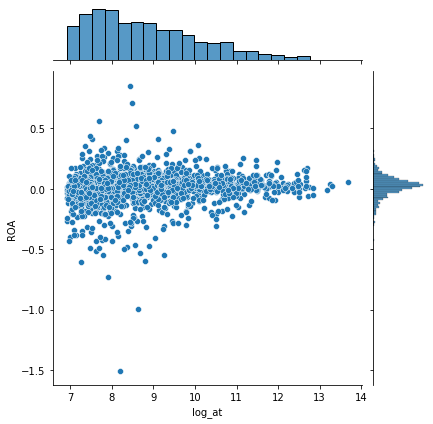

In [8]:
sns.jointplot(x='log_at', y= 'ROA', data= df)
plt.show()

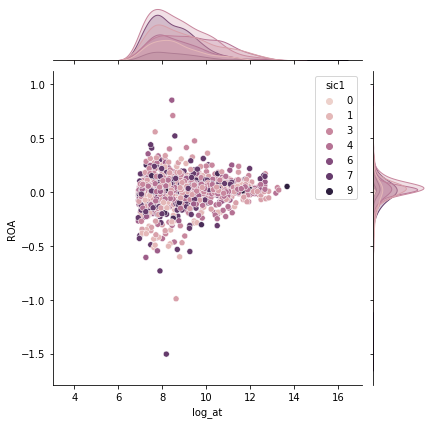

In [9]:
sns.jointplot(x='log_at', y= 'ROA', data= df, hue= 'sic1')
plt.show()

-----------------